In [437]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
from scipy.stats import skew
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold

In [438]:
#Reading data
data = pd.read_csv('./data/train.csv')


# Data Exploration

## Basic Statistics & Observations

In [439]:
#Read first 5 lines
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [440]:
#general shape of the data
data.shape

(1460, 81)

In [441]:
#Basic Statistics about all the *quantitative* columns
data.describe()

/Users/tiffanychien/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,NaN,7553.500000,5.000000,5.000000,1954.000000,1967.000000,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,NaN,9478.500000,6.000000,5.000000,1973.000000,1994.000000,NaN,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,NaN,11601.500000,7.000000,6.000000,2000.000000,2004.000000,NaN,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [442]:
#Basic Statistics about all the *categorical* columns
data.describe(include = ['O'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [443]:
#Correlations
data.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


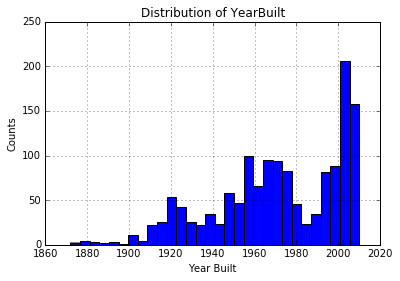

In [466]:
# some graphs of different variables
data['YearBuilt'].hist(bins=30)
plt.title('Distribution of YearBuilt')
plt.xlabel('Year Built')
plt.ylabel('Counts')

There are more new houses in the dataset than old houses, other than a dip around 1990.

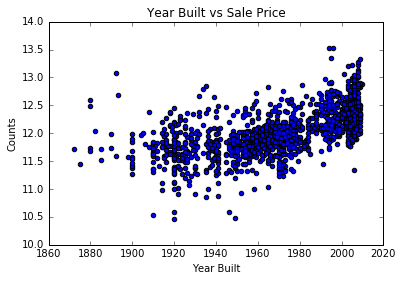

In [468]:
plt.scatter(data['YearBuilt'], data['SalePrice'])
plt.title('Year Built vs Sale Price')
plt.xlabel('Year Built')
plt.ylabel('Sale Price')

There seems to be a somewhat weak positive correlation between the year the house was built and its price, with quite a few outliers.

# Data Cleaning & Feature Engineering 

In [444]:
#log-transforming response variables 
data['SalePrice'] = np.log1p(data['SalePrice'])

In [445]:
#Splitting categorical variables into dummies
data = pd.get_dummies(data, drop_first=True)

data.shape

(1460, 247)

In [1]:
#Filling NAs with column means
data = data.fillna(data.mean())

#And checking if any NAs exist after the code running
data.isnull().values.any()

NameError: name 'data' is not defined

# Model Building

In [447]:
#Splitting datasets into train & test
local_train, local_test = train_test_split(data, test_size = 0.2, random_state=123)

In [448]:
#Removing SalesPrices (is the predicting y-variable)

local_train_y = local_train['SalePrice']
local_train_x = local_train.drop('SalePrice', axis = 1)

local_test_y = local_test['SalePrice']
local_test_x = local_test.drop('SalePrice', axis = 1)

In [449]:
#General statistics to make sure everything is right
local_train.shape[0] + local_test.shape[0] == data.shape[0]

True

In [450]:
#General statistics to make sure everything is right
local_train.shape[1] == local_test.shape[1] == data.shape[1]

True

In [451]:
#Fitting model 
clf = sm.OLS(local_train_y,local_train_x)
result = clf.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.203e+04
Date:                Sun, 02 Oct 2016   Prob (F-statistic):               0.00
Time:                        23:10:46   Log-Likelihood:                 1089.3
No. Observations:                1168   AIC:                            -1701.
Df Residuals:                     929   BIC:                            -490.6
Df Model:                         239                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Id                    -6.255e-06   8.34e-06     -0.750      0.454     -2.26e-05  1.01e-05
MSSubClass               -0.0003      0.000     -0.662      0.508        -0.001     0.001
LotFrontage               0.0005      0.000      2.046      0.041      2.16e-05     0.001
LotArea                2.351e-06   6.09e-07      3.858      0.000      1.16e-06  3.55e-06
OverallQual               0.0373      0.006      6.760      0.000         0.026     0.048
OverallCond               0.0368      0.005      7.909      0.000         0.028     0.046
YearBuilt                 0.0017      0.000      4.227      0.000         0.001     0.002
YearRemodAdd              0.0007      0.000      2.502      0.013         0.000     0.001
MasVnrArea             1.891e-06   3.21e-05      0.059      0.953     -6.12e-05   6.5e-05
BsmtFinSF1             5.557e-05    1.5e-05      3.699      0.000      2.61e-05   8.5e-05
BsmtFinSF2             4.926e-05   2.96e-05      1.662      0.097     -8.91e-06     0.000
BsmtUnfSF             -9.627e-06   1.45e-05     -0.665      0.506      -3.8e-05  1.88e-05
TotalBsmtSF             9.52e-05   1.92e-05      4.958      0.000      5.75e-05     0.000
1stFlrSF               7.979e-05   3.37e-05      2.370      0.018      1.37e-05     0.000
2ndFlrSF               6.321e-05   2.93e-05      2.158      0.031      5.71e-06     0.000
LowQualFinSF           3.398e-06    7.5e-05      0.045      0.964        -0.000     0.000
GrLivArea                 0.0001   3.09e-05      4.735      0.000      8.57e-05     0.000
BsmtFullBath              0.0263      0.010      2.532      0.012         0.006     0.047
BsmtHalfBath              0.0029      0.017      0.173      0.862        -0.030     0.036
FullBath                  0.0113      0.012      0.973      0.331        -0.011     0.034
HalfBath                  0.0150      0.011      1.340      0.181        -0.007     0.037
BedroomAbvGr              0.0053      0.007      0.722      0.471        -0.009     0.020
KitchenAbvGr             -0.0577      0.037     -1.553      0.121        -0.131     0.015
TotRmsAbvGrd              0.0088      0.005      1.717      0.086        -0.001     0.019
Fireplaces                0.0176      0.013      1.383      0.167        -0.007     0.042
GarageYrBlt              -0.0004      0.000     -1.081      0.280        -0.001     0.000
GarageCars                0.0231      0.012      1.870      0.062        -0.001     0.047
GarageArea                0.0001   4.29e-05      2.656      0.008      2.98e-05     0.000
WoodDeckSF                0.0001   3.06e-05      3.509      0.000      4.73e-05     0.000
OpenPorchSF            6.613e-05   6.39e-05      1.035      0.301     -5.93e-05     0.000
EnclosedPorch           2.88e-05   6.85e-05      0.420      0.674        -0.000     0.000
3SsnPorch              

In [452]:
local_train_x.shape

(1168, 246)

In [453]:
local_train_x.drop(['MasVnrArea','LowQualFinSF','BsmtHalfBath','Condition1_RRAe','Condition2_RRNn','BldgType_Duplex','HouseStyle_1.5Unf','RoofStyle_Gable','RoofStyle_Gambrel','RoofStyle_Hip','Exterior1st_CBlock','Exterior1st_HdBoard','Exterior1st_Plywood','Exterior1st_Stucco','Exterior1st_WdShing','Exterior2nd_Brk Cmn','Exterior2nd_CBlock','Exterior2nd_ImStucc','Exterior2nd_Stone','Exterior2nd_Wd Sdng','BsmtExposure_Mn','BsmtFinType1_Unf','BsmtFinType2_GLQ','BsmtFinType2_Unf','Electrical_SBrkr','KitchenQual_Fa','FireplaceQu_Fa','FireplaceQu_Po','GarageQual_TA','GarageCond_Po','PavedDrive_P','PoolQC_Fa','SaleCondition_Family'],axis=1,inplace=True)
local_test_x.drop(['MasVnrArea','LowQualFinSF','BsmtHalfBath','Condition1_RRAe','Condition2_RRNn','BldgType_Duplex','HouseStyle_1.5Unf','RoofStyle_Gable','RoofStyle_Gambrel','RoofStyle_Hip','Exterior1st_CBlock','Exterior1st_HdBoard','Exterior1st_Plywood','Exterior1st_Stucco','Exterior1st_WdShing','Exterior2nd_Brk Cmn','Exterior2nd_CBlock','Exterior2nd_ImStucc','Exterior2nd_Stone','Exterior2nd_Wd Sdng','BsmtExposure_Mn','BsmtFinType1_Unf','BsmtFinType2_GLQ','BsmtFinType2_Unf','Electrical_SBrkr','KitchenQual_Fa','FireplaceQu_Fa','FireplaceQu_Po','GarageQual_TA','GarageCond_Po','PavedDrive_P','PoolQC_Fa','SaleCondition_Family'],axis=1,inplace=True)
local_train_x.shape

(1168, 213)

In [454]:
#Refitting model 
clf = sm.OLS(local_train_y,local_train_x)
result = clf.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.314e+04
Date:                Sun, 02 Oct 2016   Prob (F-statistic):               0.00
Time:                        23:10:47   Log-Likelihood:                 1088.7
No. Observations:                1168   AIC:                            -1759.
Df Residuals:                     959   BIC:                            -701.3
Df Model:                         209                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Id                    -6.633e-06   8.03e-06     -0.826      0.409     -2.24e-05  9.13e-06
MSSubClass               -0.0003      0.000     -0.753      0.452        -0.001     0.000
LotFrontage               0.0005      0.000      2.079      0.038      2.89e-05     0.001
LotArea                2.359e-06   5.89e-07      4.005      0.000       1.2e-06  3.51e-06
OverallQual               0.0372      0.005      7.023      0.000         0.027     0.048
OverallCond               0.0369      0.005      8.195      0.000         0.028     0.046
YearBuilt                 0.0017      0.000      4.495      0.000         0.001     0.002
YearRemodAdd              0.0007      0.000      2.593      0.010         0.000     0.001
BsmtFinSF1             5.466e-05   1.14e-05      4.797      0.000      3.23e-05   7.7e-05
BsmtFinSF2             5.584e-05   2.24e-05      2.497      0.013       1.2e-05  9.97e-05
BsmtUnfSF             -1.286e-05   1.19e-05     -1.079      0.281     -3.63e-05  1.05e-05
TotalBsmtSF            9.763e-05    1.8e-05      5.428      0.000      6.23e-05     0.000
1stFlrSF               7.892e-05   9.88e-05      0.799      0.425        -0.000     0.000
2ndFlrSF               6.108e-05    9.4e-05      0.650      0.516        -0.000     0.000
GrLivArea                 0.0001   9.75e-05      1.518      0.129     -4.33e-05     0.000
BsmtFullBath              0.0260      0.010      2.710      0.007         0.007     0.045
FullBath                  0.0109      0.011      0.969      0.333        -0.011     0.033
HalfBath                  0.0140      0.011      1.296      0.195        -0.007     0.035
BedroomAbvGr              0.0050      0.007      0.716      0.474        -0.009     0.019
KitchenAbvGr             -0.0548      0.027     -2.042      0.041        -0.107    -0.002
TotRmsAbvGrd              0.0092      0.005      1.853      0.064        -0.001     0.019
Fireplaces                0.0161      0.010      1.597      0.111        -0.004     0.036
GarageYrBlt              -0.0004      0.000     -1.193      0.233        -0.001     0.000
GarageCars                0.0238      0.012      1.991      0.047         0.000     0.047
GarageArea                0.0001   4.15e-05      2.745      0.006      3.25e-05     0.000
WoodDeckSF                0.0001   2.97e-05      3.596      0.000      4.86e-05     0.000
OpenPorchSF            6.734e-05   6.18e-05      1.089      0.276      -5.4e-05     0.000
EnclosedPorch          3.093e-05   6.58e-05      0.470      0.638     -9.82e-05     0.000
3SsnPorch                 0.0001      0.000      1.325      0.185     -7.06e-05     0.000
ScreenPorch               0.0003   6.58e-05      3.917      0.000         0.000     0.000
PoolArea                  0.0002      0.000      1.232      0.218     -8.92e-05     0.000
MiscVal                

In [455]:
local_train_x.drop(['2ndFlrSF','EnclosedPorch','MiscVal','MoSold','LotShape_IR3','LotShape_Reg','Neighborhood_BrkSide','Neighborhood_ClearCr','Neighborhood_NPkVill','Neighborhood_NoRidge','Neighborhood_SWISU','Neighborhood_Somerst','Neighborhood_Timber','Neighborhood_Veenker','Condition1_RRNe','Condition2_RRAn','BldgType_2fmCon','BldgType_TwnhsE','HouseStyle_SLvl','Exterior1st_VinylSd','Exterior2nd_AsphShn','Exterior2nd_Stucco','Exterior2nd_Wd Shng','ExterQual_Gd','ExterQual_TA','ExterCond_TA','BsmtQual_Fa','BsmtFinType1_BLQ','BsmtFinType1_Rec','Electrical_Mix','Functional_Min2','FireplaceQu_Gd','GarageFinish_RFn','MiscFeature_Shed','SaleType_ConLw','SaleType_WD','SaleCondition_Partial'],axis=1,inplace=True)
local_test_x.drop(['2ndFlrSF','EnclosedPorch','MiscVal','MoSold','LotShape_IR3','LotShape_Reg','Neighborhood_BrkSide','Neighborhood_ClearCr','Neighborhood_NPkVill','Neighborhood_NoRidge','Neighborhood_SWISU','Neighborhood_Somerst','Neighborhood_Timber','Neighborhood_Veenker','Condition1_RRNe','Condition2_RRAn','BldgType_2fmCon','BldgType_TwnhsE','HouseStyle_SLvl','Exterior1st_VinylSd','Exterior2nd_AsphShn','Exterior2nd_Stucco','Exterior2nd_Wd Shng','ExterQual_Gd','ExterQual_TA','ExterCond_TA','BsmtQual_Fa','BsmtFinType1_BLQ','BsmtFinType1_Rec','Electrical_Mix','Functional_Min2','FireplaceQu_Gd','GarageFinish_RFn','MiscFeature_Shed','SaleType_ConLw','SaleType_WD','SaleCondition_Partial'],axis=1,inplace=True)
local_train_x.shape

(1168, 176)

In [456]:
#Refitting model 
clf = sm.OLS(local_train_y,local_train_x)
result = clf.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.121e+04
Date:                Sun, 02 Oct 2016   Prob (F-statistic):               0.00
Time:                        23:10:47   Log-Likelihood:                 1081.7
No. Observations:                1168   AIC:                            -1819.
Df Residuals:                     996   BIC:                            -948.6
Df Model:                         172                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Id                    -7.964e-06   7.77e-06     -1.025      0.306     -2.32e-05  7.29e-06
MSSubClass               -0.0004      0.000     -2.967      0.003        -0.001    -0.000
LotFrontage               0.0006      0.000      2.591      0.010         0.000     0.001
LotArea                2.444e-06   5.27e-07      4.642      0.000      1.41e-06  3.48e-06
OverallQual               0.0367      0.005      7.427      0.000         0.027     0.046
OverallCond               0.0378      0.004      8.905      0.000         0.029     0.046
YearBuilt                 0.0017      0.000      5.035      0.000         0.001     0.002
YearRemodAdd              0.0008      0.000      2.803      0.005         0.000     0.001
BsmtFinSF1             5.359e-05   1.08e-05      4.951      0.000      3.24e-05  7.48e-05
BsmtFinSF2              5.41e-05   2.13e-05      2.544      0.011      1.24e-05  9.58e-05
BsmtUnfSF             -1.185e-05   1.11e-05     -1.067      0.286     -3.37e-05  9.95e-06
TotalBsmtSF            9.583e-05   1.69e-05      5.668      0.000      6.27e-05     0.000
1stFlrSF               1.757e-05   3.16e-05      0.556      0.578     -4.44e-05  7.96e-05
GrLivArea                 0.0002   2.43e-05      8.739      0.000         0.000     0.000
BsmtFullBath              0.0272      0.009      2.942      0.003         0.009     0.045
FullBath                  0.0080      0.011      0.752      0.452        -0.013     0.029
HalfBath                  0.0137      0.010      1.312      0.190        -0.007     0.034
BedroomAbvGr              0.0067      0.007      0.997      0.319        -0.006     0.020
KitchenAbvGr             -0.0383      0.023     -1.640      0.101        -0.084     0.008
TotRmsAbvGrd              0.0085      0.005      1.835      0.067        -0.001     0.018
Fireplaces                0.0190      0.007      2.596      0.010         0.005     0.033
GarageYrBlt              -0.0003      0.000     -1.137      0.256        -0.001     0.000
GarageCars                0.0245      0.012      2.133      0.033         0.002     0.047
GarageArea                0.0001   3.97e-05      2.926      0.004      3.83e-05     0.000
WoodDeckSF                0.0001   2.88e-05      3.842      0.000       5.4e-05     0.000
OpenPorchSF            6.825e-05   5.92e-05      1.153      0.249     -4.79e-05     0.000
3SsnPorch                 0.0001      0.000      1.314      0.189     -6.92e-05     0.000
ScreenPorch               0.0003   6.34e-05      4.154      0.000         0.000     0.000
PoolArea                  0.0001      0.000      1.158      0.247     -9.39e-05     0.000
YrSold                    0.0014      0.000      3.323      0.001         0.001     0.002
MSZoning_FV               0.4987      0.051      9.742      0.000         0.398     0.599
MSZoning_RH            

In [457]:
#Predictions based off our model
preds = result.predict(local_test_x)
preds[0:5]

array([ 12.26705006,  11.3662339 ,  11.86414711,  12.45139966,  11.76481408])

In [458]:
#RMSE
rmse = (sum((local_test_y - preds) ** 2) / preds.shape[0]) ** 0.5
rmse

0.11376542632433698

# Actual Kaggle Dataset

In [459]:
#Import the test dataset (doesn't contain the test SalePrice values)
actual_test = pd.read_csv('./data/test.csv')
actual_test.shape

(1459, 80)

In [460]:
#Use the whole dataset to re-train
#Removing SalesPrices (is the predicting y-variable)
train_y = data['SalePrice']
train_x = data.drop('SalePrice', axis = 1)

In [461]:
#Feature engineer test dataset predictor columns
actual_test = pd.get_dummies(actual_test, drop_first=True)
actual_test = actual_test.fillna(actual_test.mean())
actual_test.drop(['MasVnrArea','LowQualFinSF','BsmtHalfBath','Condition1_RRAe','BldgType_Duplex','HouseStyle_1.5Unf','RoofStyle_Gable','RoofStyle_Gambrel','RoofStyle_Hip','Exterior1st_CBlock','Exterior1st_HdBoard','Exterior1st_Plywood','Exterior1st_Stucco','Exterior1st_WdShing','Exterior2nd_Brk Cmn','Exterior2nd_CBlock','Exterior2nd_ImStucc','Exterior2nd_Stone','Exterior2nd_Wd Sdng','BsmtExposure_Mn','BsmtFinType1_Unf','BsmtFinType2_GLQ','BsmtFinType2_Unf','Electrical_SBrkr','KitchenQual_Fa','FireplaceQu_Fa','FireplaceQu_Po','GarageQual_TA','GarageCond_Po','PavedDrive_P','SaleCondition_Family'],axis=1,inplace=True)
actual_test.drop(['2ndFlrSF','EnclosedPorch','MiscVal','MoSold','LotShape_IR3','LotShape_Reg','Neighborhood_BrkSide','Neighborhood_ClearCr','Neighborhood_NPkVill','Neighborhood_NoRidge','Neighborhood_SWISU','Neighborhood_Somerst','Neighborhood_Timber','Neighborhood_Veenker','Condition1_RRNe','BldgType_2fmCon','BldgType_TwnhsE','HouseStyle_SLvl','Exterior1st_VinylSd','Exterior2nd_AsphShn','Exterior2nd_Stucco','Exterior2nd_Wd Shng','ExterQual_Gd','ExterQual_TA','ExterCond_TA','BsmtQual_Fa','BsmtFinType1_BLQ','BsmtFinType1_Rec','Functional_Min2','FireplaceQu_Gd','GarageFinish_RFn','MiscFeature_Shed','SaleType_ConLw','SaleType_WD','SaleCondition_Partial'],axis=1,inplace=True)

#Also remove columns not in actual_test from train_x
train_x = train_x.iloc[:, train_x.columns.isin(actual_test.columns)]
train_x.shape

(1460, 162)

In [462]:
#Fitting model 
actual_clf = sm.OLS(train_y, train_x)
actual_result = actual_clf.fit()
actual_result.summary()

actual_preds = actual_result.predict(actual_test)
actual_preds[0:5]

array([ 11.66476646,  11.9162187 ,  12.08137814,  12.19944302,  12.18463637])

In [463]:
# Converting predictions back to actual housing values
actual_preds = np.exp(actual_preds) - 1
actual_preds

array([ 116396.51463577,  149673.57267838,  176552.3083296 , ...,
        161159.65985258,  110287.76978393,  222581.85988514])

In [464]:
#Exporting to CSV
submission = pd.concat([pd.Series(actual_test['Id']), pd.Series(actual_preds, name = 'SalePrice')], axis = 1)
submission.to_csv('submission.csv', index = False)

# Model Interpretation

From the results of the linear regression significance tests, the most important features ar predicting house sale price include features related to the size of the house (Lot Area, SF of living area), Overall Quality and Condition, its newness (Year built and remodeled), and location (MSZoning, some neighborhoods).

Those are mostly expected features to be important, but one surprising feature that the model indicates to be very important is roof material (P=0.000 for all dummies of RoofMatl)